# Linear Regression for Ailerons Control

**Background of code:**

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this code, I will design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. 

The goal is to use these features to predict the `Goal` column, which is a command that the controller should issue. The predictions are made by implementing linear regression.

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [3]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [4]:
X_df=df.drop(columns=['Goal'])
y_df=df['Goal']

We will split the dataset into a training (70%), validation (15%) and testing set (15%).

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=15/85, random_state=1)

It is important to scale the training, validation and testing sets.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

columns=X_train.columns
X_train_index=X_train.index
X_val_index=X_val.index
X_test_index=X_test.index


X_train_norm=scaler.fit_transform(X_train)
X_val_norm=scaler.transform(X_val)
X_test_norm=scaler.transform(X_test)

In [7]:
X_train_norm=pd.DataFrame(X_train_norm,index=X_train_index,columns=columns)
X_val_norm=pd.DataFrame(X_val_norm,index=X_val_index,columns=columns)
X_test_norm=pd.DataFrame(X_test_norm,index=X_test_index,columns=columns)

In [8]:
ones_column_train=np.ones(len(X_train))
ones_column_val=np.ones(len(X_val))
ones_column_test=np.ones(len(X_test))
ones_column_train=pd.Series(ones_column_train,index=X_train_index)
ones_column_val=pd.Series(ones_column_val,index=X_val_index)
ones_column_test=pd.Series(ones_column_test,index=X_test_index)

In [9]:
X_train_norm_one=X_train_norm.copy()
X_val_norm_one=X_val_norm.copy()
X_test_norm_one=X_test_norm.copy()
X_train_norm_one.insert(0,'Ones',ones_column_train)
X_val_norm_one.insert(0,'Ones',ones_column_val)
X_test_norm_one.insert(0,'Ones',ones_column_test)

In [ ]:
X_train_norm_one

,Ones,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
8086,1.0,0.300454,-0.585755,1.129531,0.917832,0.600308,0.449172,-0.945470,-0.392270,0.223766,-0.137873,1.456885,1.448916,1.448982,1.447081,1.447307,1.443495,1.443308,1.438802,1.438864,1.434003,1.434071,1.430323,1.430131,1.427962,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.427740
9723,1.0,-1.025053,0.758921,0.244951,1.339421,1.456453,-0.892745,-0.705563,-1.255174,-0.227281,-0.048042,1.023838,1.017629,1.017680,1.015949,1.016117,1.012854,1.012705,1.008747,1.008796,1.004605,1.004658,1.001489,1.001341,0.999404,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.999244
2609,1.0,0.626084,-0.777851,0.277713,-1.105794,-0.985146,1.274966,1.213696,0.950026,-0.753503,-0.227703,-0.564002,-0.563756,-0.563761,-0.708578,-0.708644,-0.853258,-0.853242,-0.854820,-0.854834,-0.856119,-0.856136,-0.856792,-0.856748,-0.857680,-1.251431,-0.010194,2.376153,0.003398,2.189260,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.857570
8125,1.0,0.020795,-0.047884,0.638098,1.508056,0.410053,1.171742,0.014159,-2.213957,-1.881121,0.221449,0.590790,0.730104,0.730145,0.728528,0.728656,0.725760,0.725636,0.722045,0.722084,0.718340,0.718382,0.715600,0.715481,0.713699,-2.693109,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.713581
10773,1.0,-0.258864,-0.163142,0.638098,-0.852841,0.219799,-0.892745,0.254066,1.141782,-0.527979,-0.856517,0.013394,0.011293,0.011308,0.009975,0.010006,0.008025,0.007964,0.005288,0.005303,0.002677,0.002692,0.000876,0.000832,-0.000564,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.000579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,1.0,0.143385,-0.047884,-0.770679,0.243290,1.488162,0.242723,-1.185377,0.278878,1.652082,0.401110,2.611678,2.599014,2.599121,2.596765,2.597147,2.591872,2.591583,2.585613,2.585713,2.579064,2.579175,2.573880,2.573571,2.570783,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,2.410022,2.570395
11442,1.0,-0.684099,0.297889,-0.344770,0.074654,1.044235,0.449172,-0.705563,-1.063418,-1.054201,0.490941,0.590790,0.586342,0.586378,0.584817,0.584926,0.582213,0.582102,0.722045,0.722084,0.718340,0.718382,0.572655,0.572551,0.570846,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,-1.639085,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.570749
7049,1.0,1.430583,-0.777851,1.457154,1.086467,-1.207110,0.139499,0.014159,-1.446931,-0.828677,-1.036178,-0.275304,-0.276231,-0.276226,-0.277446,-0.277454,-0.279070,-0.279105,-0.281415,-0.281409,-0.283588,-0.283584,-0.285013,-0.285028,-0.286269,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.286243
4556,1.0,0.580113,-0.701012,1.555441,-0.346935,0.314926,0.345947,-0.705563,0.758269,0.825162,-0.137873,1.745583,1.736440,1.736517,1.734502,1.734767,1.587042,1.586842,1.295450,1.295508,1.290870,1.290933,1.287378,1.287201,1.285110,0.190246,-0.010194,0.126021,0.003398,4.229291,0.015573,1.952980,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.284908


In [ ]:
X_val_norm_one

,Ones,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
7510,1.0,0.848279,-0.201562,-0.672392,-0.937159,-0.255837,-0.583072,1.213696,0.566513,-0.076932,-0.137873,0.879489,0.873867,0.873913,0.872238,0.872386,0.869307,0.869171,0.865396,0.865440,0.861473,0.861520,0.858544,0.858411,0.713699,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,1.783492,0.011771,0.892517,0.713581
12561,1.0,1.223712,-0.239981,-0.115434,0.327607,-1.048564,2.513659,1.933418,-1.255174,-0.377630,0.221449,0.013394,0.011293,0.011308,0.009975,0.010006,0.008025,0.007964,0.005288,0.005303,0.002677,0.002692,0.000876,0.000832,-0.286269,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,1.783492,0.011771,-0.119153,-0.286243
849,1.0,-0.829675,-1.546237,0.965720,-0.346935,2.788234,-1.408866,-0.465655,0.374756,0.975511,-0.137873,2.034281,2.023965,2.024052,2.021923,2.022227,2.017683,2.017446,2.012207,2.012289,2.006534,2.006623,2.430936,2.430641,2.856488,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,-6.156839,0.012817,-6.370582,0.011771,2.915857,2.856059
9191,1.0,-0.163090,-0.316819,-1.262112,-0.009664,-0.129001,0.655620,0.254066,-0.200513,-0.001758,-0.137873,-0.564002,-0.419994,-0.419994,-0.421157,-0.421184,-0.422617,-0.422639,-0.424766,-0.424766,-0.426721,-0.426722,-0.427958,-0.427958,-0.429122,-2.693109,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.429074
8351,1.0,-0.936941,-1.200463,-0.803441,-1.105794,0.219799,-0.583072,1.213696,0.662391,0.599639,0.490941,-0.852701,-0.851281,-0.851296,-0.995999,-0.996104,-0.996805,-0.996777,-0.998172,-0.998190,-0.999251,-0.999274,-0.999736,-0.999678,-0.857680,-1.251431,-0.010194,2.376153,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,-3.108952,0.011771,-0.624988,-0.857570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358,1.0,0.898081,-2.199365,1.031245,-0.262617,-0.826601,0.345947,0.733881,0.374756,-0.603154,-1.305669,-0.275304,-0.276231,-0.276226,-0.277446,-0.277454,-0.279070,-0.279105,-0.281415,-0.281409,-0.283588,-0.283584,-0.285013,-0.285028,-0.286269,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.286243
1760,1.0,-0.404440,-0.239981,-1.524210,-0.599888,-0.002165,-0.479847,0.254066,0.566513,-0.152107,0.041788,-0.564002,-0.563756,-0.563761,-0.564867,-0.564914,-0.566164,-0.566173,-0.568118,-0.568122,-0.569853,-0.569860,-0.570902,-0.570888,-0.571975,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,-1.478138,0.011771,-0.624988,-0.571906
5426,1.0,-2.017267,-0.508916,-1.622497,0.327607,1.297908,0.655620,-0.945470,-0.296392,0.298941,0.760432,-0.708352,-0.707518,-0.707529,-0.708578,-0.708644,-0.566164,-0.566173,-0.568118,-0.568122,-0.283588,-0.283584,-0.285013,-0.285028,-0.286269,0.190246,-0.010194,0.126021,0.003398,-3.930833,0.015573,0.156948,0.0,-3.108930,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.286243
612,1.0,-1.182121,0.489986,-1.589735,-0.093981,0.600308,-0.376623,-0.225748,-0.200513,-0.227281,0.221449,-0.564002,-0.563756,-0.563761,-0.564867,-0.564914,-0.566164,-0.566173,-0.568118,-0.568122,-0.569853,-0.569860,-0.570902,-0.570888,-0.571975,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,-1.478138,0.011771,-0.624988,-0.571

In [ ]:
X_test_norm_one

,Ones,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
12870,1.0,0.683549,1.066275,0.539811,0.917832,-0.636346,0.242723,0.254066,-0.967539,0.524464,-1.575161,-0.130955,-0.132469,-0.132459,-0.133736,-0.133724,-0.135523,-0.135570,-0.138064,-0.138053,-0.140456,-0.140446,-0.142068,-0.142098,-0.143417,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.143411
11578,1.0,0.059105,-0.624174,0.310475,-0.852841,-0.414383,0.139499,0.733881,0.566513,0.148592,-0.048042,-0.564002,-0.563756,-0.563761,-0.564867,-0.564914,-0.566164,-0.566173,-0.568118,-0.568122,-0.569853,-0.569860,-0.570902,-0.570888,-0.571975,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.571906
2255,1.0,0.105076,-0.009465,-1.098301,-0.431252,0.758853,-1.512091,0.973788,0.470634,0.073417,-0.766686,1.312536,1.305153,1.305215,1.303370,1.303577,1.299948,1.299774,1.295450,1.295508,1.290870,1.290933,1.287378,1.287201,1.285110,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.284908
12386,1.0,0.258314,0.067373,-0.705154,1.845327,0.853980,-0.583072,-0.705563,-1.926322,0.374115,0.401110,1.601234,1.592678,1.592750,1.590791,1.591037,1.874136,1.873911,1.868856,1.868933,1.863401,1.863485,1.859157,1.858921,1.856520,0.190246,-0.010194,0.126021,0.003398,-3.930833,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.904187,1.856236
7083,1.0,-0.358468,0.297889,0.277713,-1.190112,-0.065583,0.862069,0.254066,0.662391,-0.603154,0.490941,-0.708352,-0.707518,-0.707529,-0.708578,-0.708644,-0.709711,-0.709708,-0.711469,-0.711478,-0.712986,-0.712998,-0.713847,-0.713818,-0.714827,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.714738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13086,1.0,-0.385285,-0.124723,1.391629,0.496243,-0.002165,0.242723,0.973788,-0.967539,-0.603154,-0.497195,-0.419653,-0.419994,-0.419994,-0.421157,-0.421184,-0.422617,-0.422639,-0.424766,-0.424766,-0.426721,-0.426722,-0.427958,-0.427958,-0.429122,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.429074
9217,1.0,2.135477,0.297889,-0.672392,-0.684206,-1.841291,1.584639,1.693510,-0.584026,-0.678328,0.940093,-0.275304,-0.276231,-0.276226,-0.277446,-0.277454,-0.279070,-0.279105,-0.281415,-0.281409,-0.283588,-0.283584,-0.285013,-0.285028,-0.429122,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,1.783492,0.011771,-0.624988,-0.429074
1465,1.0,-1.270233,0.682082,-1.065539,-0.178299,0.663726,-0.479847,-0.225748,-0.008757,-0.076932,1.838398,-0.564002,-0.563756,-0.563761,-0.564867,-0.564914,-0.566164,-0.566173,-0.568118,-0.568122,-0.569853,-0.569860,-0.570902,-0.570888,-0.429122,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,-3.108952,0.011771,-0.624988,-0.429074
8664,1.0,0.028457,-0.701012,0.736385,-0.178299,-0.224128,-2.028212,-1.185377,0.662391,1.727257,0.311280,-0.275304,-0.276231,-0.276226,-0.277446,-0.277454,-0.279070,-0.279105,-0.281415,-0.281409,-0.283588,-0.283584,-0.285013,-0.285028,-0.286269,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.28624

## Linear Regression Using Direct Solution

In [ ]:
from scipy import linalg

W=np.dot(linalg.inv(np.dot(X_train_norm_one.T,X_train_norm_one)), np.dot(X_train_norm_one.T,y_train))
y_pred_train = np.dot(X_train_norm_one, W)
y_pred_val = np.dot(X_val_norm_one, W)

In [16]:
from sklearn.metrics import mean_squared_error
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [ ]:
RMSE_train=rmse(y_pred_train,y_train)
RMSE_val=rmse(y_pred_val,y_val)

print("The RMSE for the training set is:",RMSE_train)
print("The RMSE for the validation set is:",RMSE_val)

The RMSE for the training set is: 0.00017582566439460675
The RMSE for the validation set is: 0.00017098053894782936


## Full Batch Gradient Descent

I will now implement a "full batch" gradient descent algorithm. 

Full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps I will follow:

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until the model's validation RMSE converges. 

  I will consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set calculated previously. 

  The quantity $RMSE_\text{Direct Solution}\times 1.001$ is the convergence threshold (CT).
  

2.  I will record the training time (from the first iteration until convergence). 

In [ ]:
y_train_array=np.array(y_train)

In [ ]:
import time
import matplotlib.pyplot as plt

def full_batch_GD(X_train,y_train,X_val,y_val,lr=0.01,CT=1.001*RMSE_val):

  w = (np.random.random(41)).reshape(1,-1)/(41*100)
  rmse_array_train=[]
  rmse_array_val=[]
  time_list=[]

  start_time = time.time()

  for epoch in range (0, 5000):
    y_pred_train2= np.dot(X_train,w.T).reshape (-1,1)
    y_pred_val2= np.dot(X_val,w.T).reshape (-1,1)
    rmse_array_train.append(rmse(y_pred_train2,y_train))
    rmse_array_val.append(rmse(y_pred_val2,y_val))
    if (rmse_array_val[-1]>CT):
      gradient = (1/len(y_train) * np.dot(X_train_norm_one.T, (y_pred_train2-y_train_array.reshape(-1,1)))).reshape(1,-1)
      w = w - lr * gradient
      time_list.append(time.time() - start_time)
    else:
      time_list.append(time.time() - start_time)
      break
    
  time_list=np.array(time_list).reshape(-1,1)
  epochs=np.arange(epoch+1).reshape(-1,1)
  time_list=np.concatenate((epochs,time_list),1)
  time_list=pd.DataFrame(time_list,columns=['Epoch','Elapsed Time'])

  print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

  plt.plot(rmse_array_train, label='RMSE Training')
  plt.plot(rmse_array_val, label='RMSE Validation')
  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('RMSE')
  return w,time_list

--- Total Training Time: 4.470550537109375 (s) ---


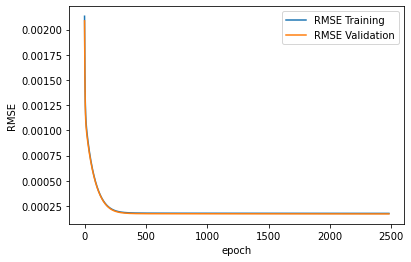

In [ ]:
w1,time_list1=full_batch_GD(X_train_norm_one,y_train,X_val_norm_one,y_val,lr=0.01,CT=1.001*RMSE_val)

The curves for both training and validation are identical, which means the model is able to generalize from the training dataset, and predict the labels as good for the new validation data points as it does for the ones it was trained on. This means the model is not overfitting.

Additionally, the RMSE values when the model converges are very low, which means it is also not underfitting because the model is predicting well for both training and validation.

## Mini-batch and Stochastic Gradient Descent

I will write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.

I will try multiple batch sizes to be able to assess which model is the best to predict on the testing set. Since some of the batch sizes will not allow the gradient descent to converge to a solution, I will check if the validation RMSE is diverging.

In [ ]:
X_train_norm_one[9600:9629].shape ## This is an example of how even if j+batch_size is greater than the length of the X_train, it will only take it until the end of the length of X_train.

(24, 41)

In [ ]:
def mini_batch_GD (X_train,y_train,X_val,y_val,batch_size,lr=0.01,CT=1.001*RMSE_val):

  if batch_size>=len(X_train):

    w_final, time_list_final=full_batch_GD(X_train,y_train,X_val,y_val,lr,CT)

    return w_final, time_list_final

  else:

    X_train_copy=X_train.copy()
    y_train_copy=y_train.copy()
    X_train_copy=np.array(X_train_copy)
    y_train_copy=np.array(y_train_copy)

    rmse_array_train=[]
    rmse_array_val=[]

    time_list=[]

    batch_num=int(np.ceil(len(X_train)/batch_size))
    index=np.arange(len(X_train))

    w = (np.random.random(41)).reshape(1,-1)/(41*100)

    converged = 0
    
    start_time = time.time()

    for epoch in range (0, 5000): 
      j=0
      np.random.shuffle(index)
      X_train_copy=X_train_copy[index]
      y_train_copy=y_train_copy[index]

      for i in range(batch_num):
        X_batch=X_train_copy[j:j+batch_size,:]
        y_batch=y_train_copy[j:j+batch_size]
        y_pred_train2= np.dot(X_batch,w.T).reshape(-1,1)
        gradient = (1/len(X_batch) * np.dot(X_batch.T, y_pred_train2-y_batch.reshape(-1,1))).reshape(1,-1)
        w = w - lr * gradient
        j=j+batch_size  

      y_pred_train2=np.dot(X_train,w.T).reshape(-1,1)
      y_pred_val2= np.dot(X_val,w.T).reshape(-1,1)
      rmse_array_train.append(rmse(y_pred_train2,y_train))
      rmse_array_val.append(rmse(y_pred_val2,y_val))
      time_list.append(time.time() - start_time)

      if len(rmse_array_val)>=100 and (sorted(rmse_array_val[-40:])==rmse_array_val[-40:]):
        w_final=w
        time_list=np.array(time_list).reshape(-1,1)
        epochs=np.arange(epoch+1).reshape(-1,1)
        time_list=np.concatenate((epochs,time_list),1)
        time_list_final=pd.DataFrame(time_list,columns=['Epoch','Elapsed Time'])
        print("The model diverged!")
        break

      else: 
        if rmse_array_val[-1]<=CT:
          w_final=w
          time_list=np.array(time_list).reshape(-1,1)
          epochs=np.arange(epoch+1).reshape(-1,1)
          time_list=np.concatenate((epochs,time_list),1)
          time_list_final=pd.DataFrame(time_list,columns=['Epoch','Elapsed Time'])
          print("The model converged!")
          converged = 1
          break 

    return w_final, rmse_array_train, rmse_array_val, time_list_final, converged

Now, I will test the function on the following batch sizes: 4, 32, 128, 256, 512, 1024, and 2048.

Results for batch size= 4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_

The model diverged!
Results for batch size= 32


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, a

The model diverged!
Results for batch size= 128
The model converged!
The time to converge was 0.25940966606140137
The model converged in 31.0 epochs
Results for batch size= 256
The model converged!
The time to converge was 0.4077000617980957
The model converged in 59.0 epochs
Results for batch size= 512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged!
The time to converge was 0.9639878273010254
The model converged in 174.0 epochs
Results for batch size= 1024


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged!
The time to converge was 1.8327512741088867
The model converged in 348.0 epochs
Results for batch size= 2048


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged!
The time to converge was 2.4303269386291504
The model converged in 631.0 epochs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


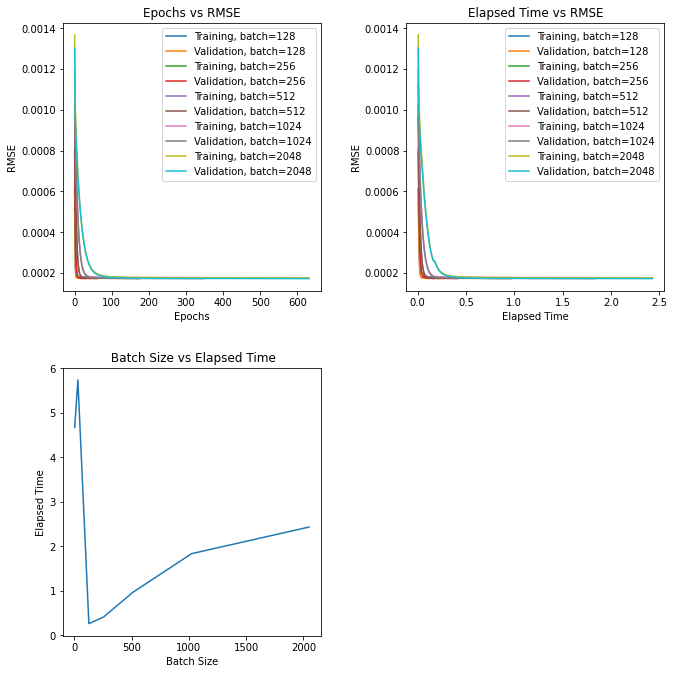

In [ ]:
batch_size_list=[4,32,128,256,512,1024,2048]
figure=plt.figure(figsize=(10,10))
time_list2=[]

for i in batch_size_list:
  print("Results for batch size=",i)
  w_batch, rmse_array_train, rmse_array_val, time_list_batch, converged=mini_batch_GD (X_train_norm_one,y_train,X_val_norm_one,y_val,batch_size=i)
  if converged==1:
    print("The time to converge was", time_list_batch.iloc[-1]['Elapsed Time'])
    print("The model converged in", time_list_batch.iloc[-1]['Epoch'],"epochs")

    plt.subplot(2, 2, 1)
    plt.plot(time_list_batch['Epoch'],rmse_array_train, label='Training, batch='+str(i))
    plt.plot(time_list_batch['Epoch'],rmse_array_val, label='Validation, batch='+str(i))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title('Epochs vs RMSE')

    plt.subplot(2, 2, 2)
    plt.plot(time_list_batch['Elapsed Time'],rmse_array_train, label='Training, batch='+str(i))
    plt.plot(time_list_batch['Elapsed Time'],rmse_array_val, label='Validation, batch='+str(i))
    plt.legend()
    plt.xlabel('Elapsed Time')
    plt.ylabel('RMSE')
    plt.title('Elapsed Time vs RMSE')

  time_list2.append(time_list_batch.iloc[-1]['Elapsed Time'])

plt.subplot(2, 2, 3)
plt.plot(batch_size_list,time_list2)
plt.xlabel('Batch Size')
plt.ylabel('Elapsed Time')
plt.title(' Batch Size vs Elapsed Time')

figure.tight_layout(pad=3.0)

The findings from the first plot, Epochs vs RMSE, shows that for larger batch sizes, the model converged in a larger number of epochs. However, we can see that the curves that represent the training RMSE and validation RMSE have very similar behaviors and converge to the same points. This being said, the model is not overfitting nor underfitting since the RMSE value is low and the model converges for the batch sizes > 32.

The findings from the second plot show similar results, where the higher the batch size, the longer it took for the model to converge.

It is also important to note that for batch sizes less than or equal to 32, the model diverges, which could be due to the fact that the samples within the batches are creating too much noise. For example, if we had outliers in a small batch size, this would affect the gradient more drastically than if we had a larger batch size.

The last graph shows the time it took for each model having different batch sizes to converge. Notice that when the batch size was <=32, the training time depends on the stopping condition we had in the function to consider that the model diverged. The times it stopped at were between 4 and 6, however, if we allow the model to keep running, the training time until convergence will be infinity for those batch sizes (because they never converge, but rather diverge and explode). This plot just shows how for small batch sizes, the training takes longer times and does not converge.

However, for larger batch sizes, i.e. 64 and larger, we can suspect that the two (batch size and elapsed time until convergence) are positively correlated, where the elapsed time until convergence increases as the number of batches increases.

## Introducing Momentum

Momentum helps gradient descent to converge faster by behaving like a moving average of gradients.

If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

I will add momentum to my previous training function and try different values of momentums with a selected batch size.

In [ ]:
def mini_batch_GD_with_momentum (X_train,y_train,X_val,y_val,batch_size,beta, lr=0.01,CT=1.001*RMSE_val):

  if batch_size>=len(X_train):

    w_final, time_list_final=full_batch_GD(X_train,y_train,X_val,y_val,lr,CT)

    return w_final, time_list_final

  else:

    X_train_copy=X_train.copy()
    y_train_copy=y_train.copy()
    X_train_copy=np.array(X_train_copy)
    y_train_copy=np.array(y_train_copy)

    rmse_array_train=[]
    rmse_array_val=[]

    time_list=[]

    batch_num=int(np.ceil(len(X_train)/batch_size))
    index=np.arange(len(X_train))

    w = (np.random.random(41)).reshape(1,-1)/(41*100)
    
    start_time = time.time()

    for epoch in range (0, 5000): 
      j=0
      np.random.shuffle(index)
      X_train_copy=X_train_copy[index]
      y_train_copy=y_train_copy[index]

      for i in range(batch_num):
        X_batch=X_train_copy[j:j+batch_size,:]
        y_batch=y_train_copy[j:j+batch_size]
        y_pred_train2= np.dot(X_batch,w.T).reshape(-1,1)
        if i==0:
          gradient1=(1/len(X_batch) * np.dot(X_batch.T, y_pred_train2-y_batch.reshape(-1,1))).reshape(1,-1)
          w = w - lr * gradient1
        else:
          gradient2=(1/len(X_batch) * np.dot(X_batch.T, y_pred_train2-y_batch.reshape(-1,1))).reshape(1,-1)
          w = w - lr * (beta*gradient1 + (1-beta)*gradient2)
          gradient1=gradient2

        j=j+batch_size

      y_pred_train2=np.dot(X_train,w.T).reshape(-1,1)
      y_pred_val2= np.dot(X_val,w.T).reshape(-1,1)    
      rmse_array_train.append(rmse(y_pred_train2,y_train))
      rmse_array_val.append(rmse(y_pred_val2,y_val))
      time_list.append(time.time() - start_time)

      if rmse_array_val[-1]<=CT:
        w_final=w
        time_list=np.array(time_list).reshape(-1,1)
        epochs=np.arange(epoch+1).reshape(-1,1)
        time_list=np.concatenate((epochs,time_list),1)
        time_list_final=pd.DataFrame(time_list,columns=['Epoch','Elapsed Time'])
        # print("The model converged!")
        # converged = 1
        break 

    return w_final, rmse_array_train, rmse_array_val, time_list_final#, converged

I chose a batch size of 256, and will be trying momentum values between 0.1 and 1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

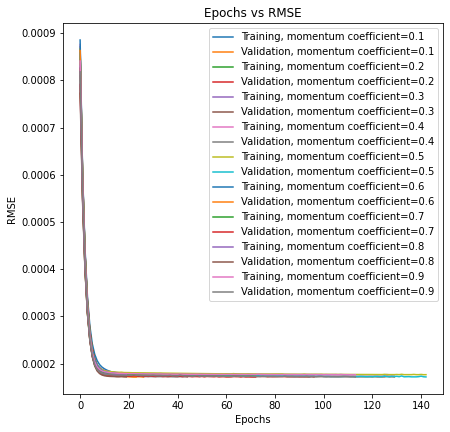

In [ ]:
beta_list=np.arange(0.1,1,0.1)
figure=plt.figure(figsize=(15,15))
time_list3=[]

for i in beta_list:
  w_beta, rmse_array_train, rmse_array_val, time_list_beta=mini_batch_GD_with_momentum (X_train_norm_one,y_train,X_val_norm_one,y_val,batch_size=256,beta=i,lr=0.01,CT=1.001*RMSE_val)
  time_list3.append(time_list_beta.iloc[-1]['Elapsed Time'])
  plt.subplot(2, 2, 1)
  plt.plot(time_list_beta['Epoch'],rmse_array_train, label='Training, momentum coefficient='+str(np.round(i,4)))
  plt.plot(time_list_beta['Epoch'],rmse_array_val, label='Validation, momentum coefficient='+str(np.round(i,4)))
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('RMSE')
  plt.title('Epochs vs RMSE')

Text(0.5, 1.0, 'Momentum Coefficient vs Training Time')

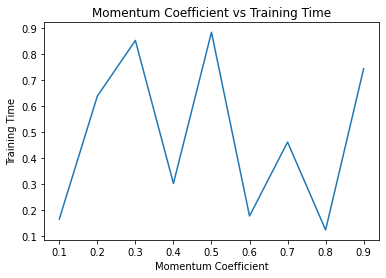

In [ ]:
plt.plot(beta_list,time_list3)
plt.xlabel('Momentum Coefficient')
plt.ylabel('Training Time')
plt.title('Momentum Coefficient vs Training Time')

Similar to part 4, the curves representing the training and validation RMSE values are very similar and are low, indicating that the model is neither underfitting nor overfitting.

Based on the two plots, the smaller the momentum coefficient was, the longer it took for the model to converge, the more the training time took, and the more higher numbers of epochs were required to converge. We can deduce that having a larger momentum coefficient is better to reduce the time to converge.

Looking at the second plot, for a batch size of 256, the training time was less than 0.2 for a momentum coefficient of 0.8, however in part 4, the time it took was 0.28. This momentum coefficient decreased the training time, which is worth looking into in the next part of this code.

## Finalizing the Model and Predicting on Test Set
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

Since having a larger batch size decreases the noise in the data, and having a smaller batch size allows the model to converge faster, I decided to compromise and select a batch size of 256.

As for the momentum coefficient, we saw that higher momentum coefficient values reduced the training time for the model. For this reason, I selected a momentum coefficient of 0.8.

Since I did not tune the learning rate, I kept it as 0.01. However, tuning the learning rate is very important and can have a big impact on how the model performs. Also, this hyperparameter allows us to change the batch size while ensuring we do not overfit or underfit. For example, for smaller batch sizes, having smaller learning rates could actually allow our model to not diverge. And for larger batch sizes, having larger learning rates could make our model converge faster.

In [ ]:
X_train_copy=X_train_norm_one.copy()
y_train_copy=y_train.copy()
X_train_copy=np.array(X_train_copy)
y_train_copy=np.array(y_train_copy)

rmse_array_train=[]
rmse_array_val=[]

time_list=[]

lr=0.01
batch_size=256
beta=0.8

batch_num=int(np.ceil(len(X_train_norm_one)/batch_size))
index=np.arange(len(X_train_norm_one))

w = (np.random.random(41)).reshape(1,-1)/(41*100)

start_time = time.time()

for epoch in range (0, 100): 
  j=0
  np.random.shuffle(index)
  X_train_copy=X_train_copy[index]
  y_train_copy=y_train_copy[index]

  for i in range(batch_num):
    X_batch=X_train_copy[j:j+batch_size,:]
    y_batch=y_train_copy[j:j+batch_size]
    y_pred_train2= np.dot(X_batch,w.T).reshape(-1,1)
    if i==0:
      gradient1=(1/len(X_batch) * np.dot(X_batch.T, y_pred_train2-y_batch.reshape(-1,1))).reshape(1,-1)
      w = w - lr * gradient1
    else:
      gradient2=(1/len(X_batch) * np.dot(X_batch.T, y_pred_train2-y_batch.reshape(-1,1))).reshape(1,-1)
      w = w - lr * (beta*gradient1 + (1-beta)*gradient2)
      gradient1=gradient2

    j=j+batch_size

  y_pred_train2=np.dot(X_train_norm_one,w.T).reshape(-1,1)
  y_pred_val2= np.dot(X_val_norm_one,w.T).reshape(-1,1)    
  rmse_array_train.append(rmse(y_pred_train2,y_train))
  rmse_array_val.append(rmse(y_pred_val2,y_val))
  time_list.append(time.time() - start_time)

w4=w
time_list=np.array(time_list).reshape(-1,1)
epochs=np.arange(epoch+1).reshape(-1,1)
time_list=np.concatenate((epochs,time_list),1)
time_list4=pd.DataFrame(time_list,columns=['Epoch','Elapsed Time'])

print(w4)
print(rmse_array_train)
print(rmse_array_val)
print(time_list4)

In [12]:
print("The mean of the test goal is", np.mean(y_test), "and the standard deviation is", np.std(y_test))

The mean of the test goal is -0.0008572952011633363 and the standard deviation is 0.0003940835513931906


In [20]:
y_pred_test=np.dot(X_test_norm_one,w4.T).reshape(-1,1)
rmse_test=rmse(y_pred_test,y_test)
print("The RMSE for the testing set is", rmse_test)

The RMSE for the testing set is 0.00016789942932709788


In [21]:
print(np.average(y_pred_test))

-0.0008591142594817086


Our testing set has a RMSE value of 0.0001679, which is a good value because it means the rate of failure is less than 0.02%, which is acceptable as stated in this paper https://www.tandfonline.com/doi/pdf/10.1080/16487788.2007.9635972. 

However, looking at the average of the goal of y_test, which is -0.000857, and its standard deviation is 0.000394, the linear model with an RMSE of 0.000168 is performing good but not **that** well (average is -0.00086). It is always better to reduce the error, therefore to better improve this model I could have tuned other parameters such as the learning rate, or I could have used other optimizers such as Adam which incorporates many hyperparameters at once such as adaptive learning rate and momentum without having to do them based on trial and error and human observation.